# Clone github repository

In [ ]:
%rm -rf 'MyLibEVA'
!git clone https://github.com/sadhana1058/MyLibEVA

Cloning into 'MyLibEVA'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
import sys
sys.path.append('/MyLibEVA/')

!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-tmhnh555
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-tmhnh555


# Libraries 

In [ ]:
from MyLibEVA.models import resnet
from MyLibEVA import utils
# from MyLibEVA import main
from MyLibEVA.GradCAM.visualization import VisualizeCam
from MyLibEVA.models.resnet import ResNet18

In [ ]:
from torchvision.utils import make_grid
import numpy as np
%matplotlib inline
import torchvision
import torchvision.transforms as transforms
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline



# CUDA Availablity

In [ ]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Model Summary

In [ ]:
!pip install torchsummary
!pip install -U albumentations

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:

device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model,  input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1,

# Train and testloaders

In [ ]:
from MyLibEVA.dataAugmentation import *
#from dataAugmentation import Cifar10Dataset

train_transforms = getTrainTransforms()
test_transforms = getTestTransforms()

class args():
    def __init__(self,device = 'cpu' ,use_cuda = False) -> None:
        self.batch_size = 256
        self.device = device
        self.use_cuda = use_cuda
        self.kwargs = {'num_workers': 1, 'pin_memory': True} if self.use_cuda else {}

trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:692: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#new
from MyLibEVA import dataAugmentation
#from dataAugmentation import Cifar10Dataset

train_transforms = dataAugmentation.getTrainTransforms()
test_transforms = dataAugmentation.getTestTransforms()

class args():
    def __init__(self,device = 'cpu' ,use_cuda = False) -> None:
        self.batch_size = 256
        self.device = device
        self.use_cuda = use_cuda
        self.kwargs = {'num_workers': 1, 'pin_memory': True} if self.use_cuda else {}

trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:692: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified


# Before data augmentation

In [ ]:

trainset = Cifar10Dataset(root='../data', train=True,download=True)#, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

testset = Cifar10Dataset(root='../data', train=False,download=True)#, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# After data augmentation

In [ ]:
trainset = Cifar10Dataset(root='../data', train=True,download=True, transform=train_transforms) 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,shuffle=True, **args().kwargs)


testset = Cifar10Dataset(root='../data', train=False,download=True, transform=test_transforms) 
testloader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,shuffle=True, **args().kwargs)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


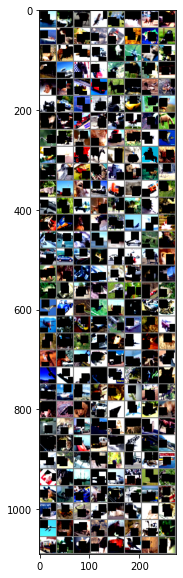

ships frogs  deer airplanes


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
batch_size = 4
classes = ("airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks")
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([256, 3, 32, 32])


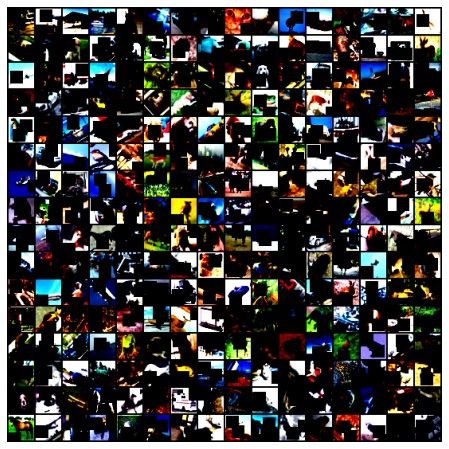

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
for images, _ in trainloader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline



# Optimizer

In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
from MyLibEVA.misclassification import *
from MyLibEVA.Accuracy import *

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision


def show_misclassified_images(model, device, dataset, classes):
  misclassified_images = []
  
  for images, labels in dataset:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            for i in range(len(labels)):
              if(len(misclassified_images)<25 and predicted[i]!=labels[i]):
                misclassified_images.append([images[i],predicted[i],labels[i]])
            if(len(misclassified_images)>25):
              break
    
  
  fig = plt.figure(figsize = (8,8))
  for i in range(25):
        sub = fig.add_subplot(5, 5, i+1)
        #imshow(misclassified_images[i][0].cpu())
        img = misclassified_images[i][0].cpu()
        img = img / 2 + 0.5 
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg,(1, 2, 0)),interpolation='none')
        
        sub.set_title("P={}, A={}".format(str(classes[misclassified_images[i][1].data.cpu().numpy()]),str(classes[misclassified_images[i][2].data.cpu().numpy()])))
        
  plt.tight_layout()



def evaluate_accuracy(model, device, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


def evaluate_classwise_accuracy(model, device, classes, test_loader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(c)):
            	label = labels[i]
            	class_correct[label] += c[i].item()
            	class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

# Test and train acc and loss

# Epoch


In [ ]:
EPOCHS = 20
from MyLibEVA.TrainnTest import *
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    trainNet(model, device, trainloader, optimizer, epoch, criterion)
    testNet(model, device, testloader) 

Epoch 1


Loss=1.8024873733520508 Batch_id=390 Train Accuracy=37.73: 100%|██████████| 391/391 [02:16<00:00,  2.87it/s]



Test set: Average loss: 1.4976, Test Accuracy: 4671/10000 (46.71%)

Epoch 2


Loss=1.3606120347976685 Batch_id=390 Train Accuracy=49.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 1.1067, Test Accuracy: 6059/10000 (60.59%)

Epoch 3


Loss=1.4138081073760986 Batch_id=390 Train Accuracy=54.67: 100%|██████████| 391/391 [02:16<00:00,  2.86it/s]



Test set: Average loss: 1.0775, Test Accuracy: 6309/10000 (63.09%)

Epoch 4


Loss=1.0150809288024902 Batch_id=390 Train Accuracy=59.79: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 1.0177, Test Accuracy: 6485/10000 (64.85%)

Epoch 5


Loss=0.9737280011177063 Batch_id=390 Train Accuracy=62.42: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.8015, Test Accuracy: 7160/10000 (71.60%)

Epoch 6


Loss=1.1444149017333984 Batch_id=390 Train Accuracy=64.90: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.7334, Test Accuracy: 7509/10000 (75.09%)

Epoch 7


Loss=0.862195611000061 Batch_id=390 Train Accuracy=67.10: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7121, Test Accuracy: 7602/10000 (76.02%)

Epoch 8


Loss=0.7897188067436218 Batch_id=390 Train Accuracy=68.69: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.6242, Test Accuracy: 7853/10000 (78.53%)

Epoch 9


Loss=0.9160833358764648 Batch_id=390 Train Accuracy=70.09: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.6283, Test Accuracy: 7886/10000 (78.86%)

Epoch 10


Loss=0.7009462714195251 Batch_id=390 Train Accuracy=71.16: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.5624, Test Accuracy: 8134/10000 (81.34%)

Epoch 11


Loss=0.6723220348358154 Batch_id=390 Train Accuracy=72.53: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.7402, Test Accuracy: 7622/10000 (76.22%)

Epoch 12


Loss=0.8994243741035461 Batch_id=390 Train Accuracy=73.57: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.5478, Test Accuracy: 8195/10000 (81.95%)

Epoch 13


Loss=0.8111507296562195 Batch_id=390 Train Accuracy=74.19: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4974, Test Accuracy: 8280/10000 (82.80%)

Epoch 14


Loss=0.8665165901184082 Batch_id=390 Train Accuracy=74.88: 100%|██████████| 391/391 [02:18<00:00,  2.82it/s]



Test set: Average loss: 0.4853, Test Accuracy: 8373/10000 (83.73%)

Epoch 15


Loss=0.6989811658859253 Batch_id=390 Train Accuracy=75.45: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4581, Test Accuracy: 8514/10000 (85.14%)

Epoch 16


Loss=0.961521327495575 Batch_id=390 Train Accuracy=76.62: 100%|██████████| 391/391 [02:18<00:00,  2.81it/s]



Test set: Average loss: 0.4549, Test Accuracy: 8445/10000 (84.45%)

Epoch 17


Loss=0.5958508253097534 Batch_id=390 Train Accuracy=76.66: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4676, Test Accuracy: 8465/10000 (84.65%)

Epoch 18


Loss=0.6554961204528809 Batch_id=390 Train Accuracy=77.36: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4495, Test Accuracy: 8460/10000 (84.60%)

Epoch 19


Loss=0.3812870383262634 Batch_id=390 Train Accuracy=78.27: 100%|██████████| 391/391 [02:17<00:00,  2.84it/s]



Test set: Average loss: 0.4370, Test Accuracy: 8565/10000 (85.65%)

Epoch 20


Loss=0.6162017583847046 Batch_id=390 Train Accuracy=78.87: 100%|██████████| 391/391 [02:19<00:00,  2.81it/s]



Test set: Average loss: 0.4252, Test Accuracy: 8615/10000 (86.15%)



# Classwise accuracy

In [ ]:
Accuracy.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of airplanes :  0 %
Accuracy of  cars :  0 %
Accuracy of birds :  0 %
Accuracy of  cats :  0 %
Accuracy of  deer :  0 %
Accuracy of  dogs :  0 %
Accuracy of frogs :  0 %
Accuracy of horses : 100 %
Accuracy of ships :  0 %
Accuracy of trucks :  0 %


In [ ]:
# import main
# no_of_epoch = 1
# # main.training_the_model = main.training_the_model
# train_loss,train_acc,test_loss,test_acc = main.training_the_model(no_of_epoch, model, criterion, optimizer, device, trainloader, testloader, best_acc, scheduler):
EPOCHS = 1
import TrainnTest
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    TrainnTest.trainNet(model, device, trainloader, optimizer, epoch, criterion)
    TrainnTest.testNet(model, device, testloader) 
    

EPOCH: 0


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


# New Section

In [ ]:
EPOCHS = 20
from MyLibEVA.TrainnTest import *
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    trainNet(model, device, trainloader, optimizer, epoch, criterion)
    testNet(model, device, testloader) 

EPOCH: 0


Loss=2.277150869369507 Batch_id=195 Accuracy=12.11: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 18 %
EPOCH: 1


Loss=1.9878718852996826 Batch_id=195 Accuracy=19.93: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 22 %
EPOCH: 2


Loss=1.7759208679199219 Batch_id=195 Accuracy=24.96: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 24 %
EPOCH: 3


Loss=1.8311853408813477 Batch_id=195 Accuracy=30.75: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 36 %
EPOCH: 4


Loss=1.693730354309082 Batch_id=195 Accuracy=34.18: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 33 %
EPOCH: 5


Loss=1.4917882680892944 Batch_id=195 Accuracy=37.58: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 40 %
EPOCH: 6


Loss=1.4621052742004395 Batch_id=195 Accuracy=40.23: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 41 %
EPOCH: 7


Loss=1.6437162160873413 Batch_id=195 Accuracy=42.33: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 47 %
EPOCH: 8


Loss=1.5879559516906738 Batch_id=195 Accuracy=45.24: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 46 %
EPOCH: 9


Loss=1.8547508716583252 Batch_id=195 Accuracy=46.64: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 49 %
EPOCH: 10


Loss=1.4357991218566895 Batch_id=195 Accuracy=47.83: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 53 %
EPOCH: 11


Loss=1.5005643367767334 Batch_id=195 Accuracy=50.32: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 56 %
EPOCH: 12


Loss=1.3782751560211182 Batch_id=195 Accuracy=51.56: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 53 %
EPOCH: 13


Loss=1.0642926692962646 Batch_id=195 Accuracy=52.95: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 59 %
EPOCH: 14


Loss=1.1729605197906494 Batch_id=195 Accuracy=54.82: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 58 %
EPOCH: 15


Loss=1.1091344356536865 Batch_id=195 Accuracy=55.76: 100%|██████████| 196/196 [03:03<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 58 %
EPOCH: 16


Loss=1.3736374378204346 Batch_id=195 Accuracy=56.88: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 66 %
EPOCH: 17


Loss=1.021959900856018 Batch_id=195 Accuracy=57.19: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 62 %
EPOCH: 18


Loss=1.206586241722107 Batch_id=195 Accuracy=58.86: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 66 %
EPOCH: 19


Loss=1.0856900215148926 Batch_id=195 Accuracy=59.64: 100%|██████████| 196/196 [03:02<00:00,  1.07it/s]


Accuracy of the network on the 10000 test images: 67 %






# GradCam and

In [ ]:
incorrect_images = identify_incorrectly_labelled_images(model, criterion, device, testloader, 10)

In [ ]:
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

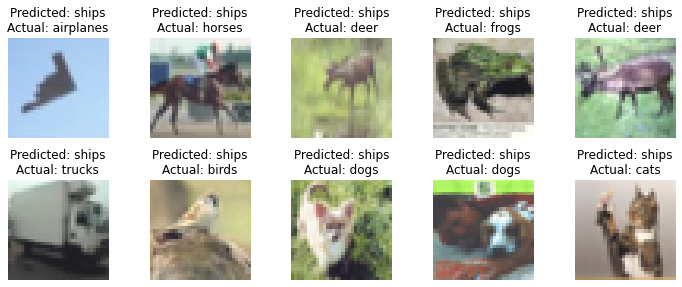

In [ ]:
import numpy as np
from MyLibEVA import utils
denormalize = utils.denormalize
plot_images(incorrect_images, classes)

In [ ]:
from MyLibEVA.GradCAM.visualization import VisualizeCam
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(model,classes, target_layers)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


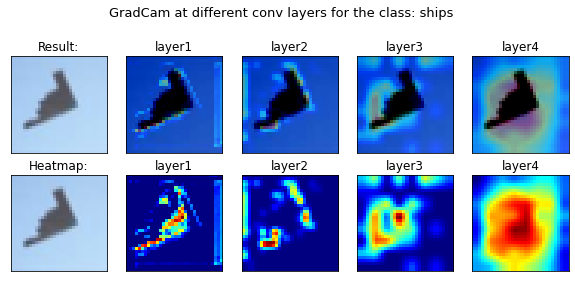

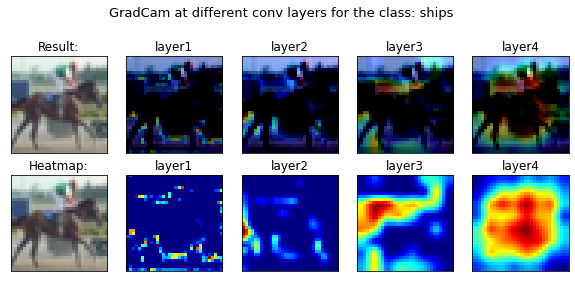

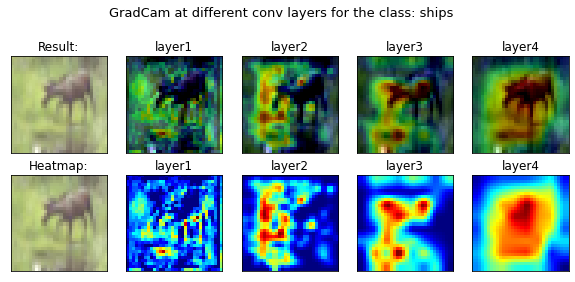

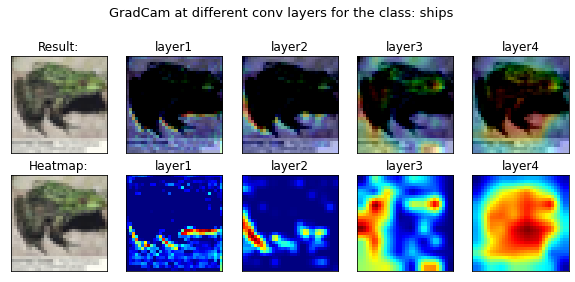

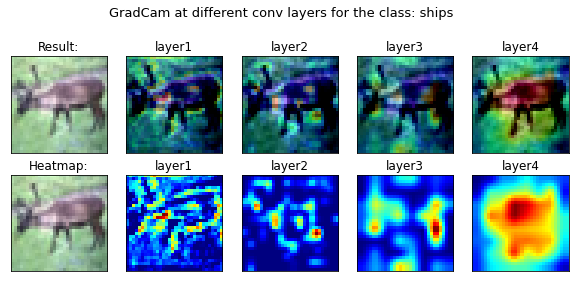

In [ ]:
incorrect_pred_imgs = []
for i in range(5):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")